In [0]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import pandas_datareader
import datetime

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
from pandas_datareader import data as web

In [0]:
start=datetime.datetime(2012,4,1)
end=datetime.datetime(2020,5,5)

In [0]:
sunP_df=web.DataReader('SUNPHARMA.NS','yahoo',start,end)
auroP_df=web.DataReader('AUROPHARMA.NS','yahoo',start,end)
lupin_df=web.DataReader('LUPIN.NS','yahoo',start,end)
cipla_df=web.DataReader('CIPLA.NS','yahoo',start,end)

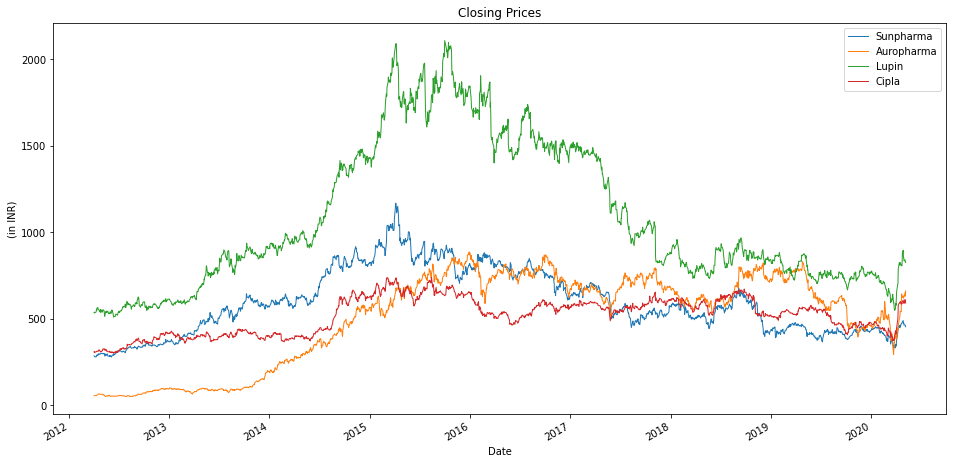

In [0]:
#Data Visualization

sunP_df['Close'].plot(label='Sunpharma',figsize=(16,8),title='Closing Prices',lw=1)
auroP_df['Close'].plot(label='Auropharma',lw=1)
lupin_df['Close'].plot(label='Lupin',lw=1)
cipla_df['Close'].plot(label='Cipla',lw=1)
plt.ylabel('(in INR)')

plt.legend()


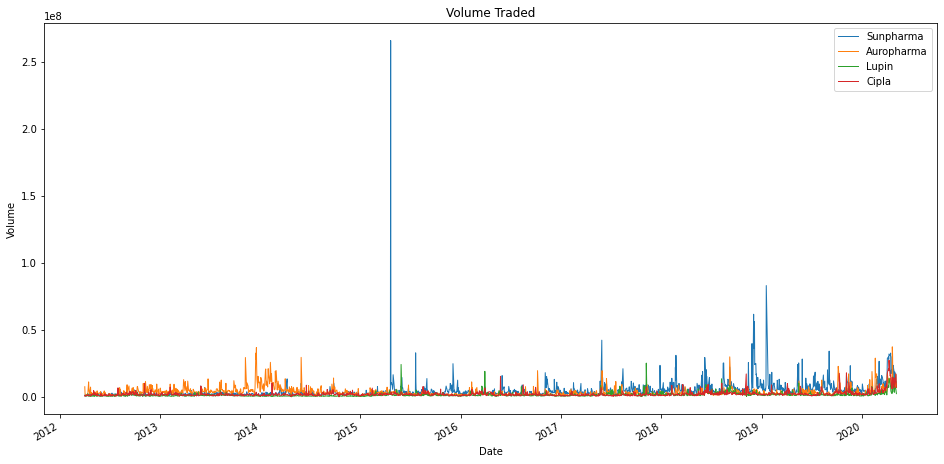

In [0]:
sunP_df['Volume'].plot(label='Sunpharma',figsize=(16,8),title='Volume Traded',lw=1)
auroP_df['Volume'].plot(label='Auropharma',lw=1)
lupin_df['Volume'].plot(label='Lupin',lw=1)
cipla_df['Volume'].plot(label='Cipla',lw=1)
plt.ylabel('count')

plt.legend()


In [0]:
sunP_df['Volume'][sunP_df['Volume']==sunP_df['Volume'].max()].index  
### 21st April 2015-Daiichi sold entire holdings to sunpharma 
 sunP_df['Volume'][800:].max()
sunP_df['Volume'][sunP_df['Volume']==82906214.0].index
###18th jan 2019-wistleblower 

DatetimeIndex(['2015-04-21'], dtype='datetime64[ns]', name='Date', freq=None)

In [0]:
#market capitalisation 
sunP_df['MArket Cap']=sunP_df['Close']*sunP_df['Volume']
auroP_df['MArket Cap']=auroP_df['Close']*auroP_df['Volume']
lupin_df['MArket Cap']=lupin_df['Close']*lupin_df['Volume']
cipla_df['MArket Cap']=cipla_df['Close']*cipla_df['Volume']


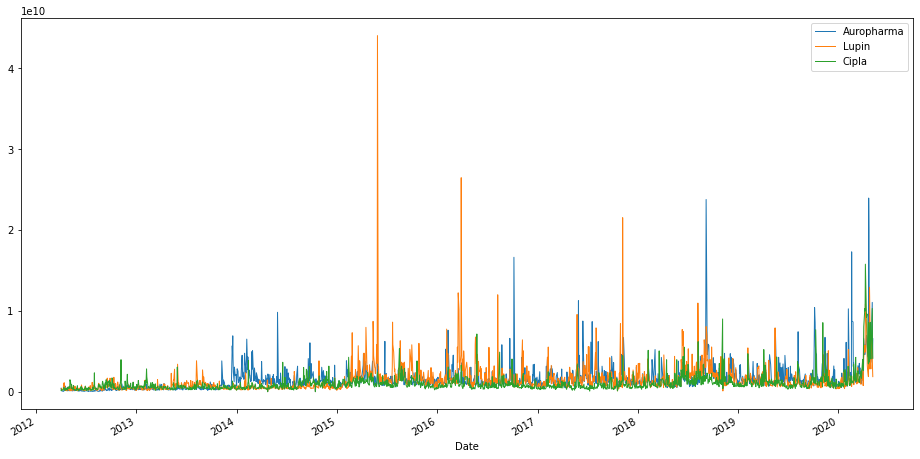

In [0]:
#plotting
# sunP_df['MArket Cap'].plot(label='Sunpharma',figsize=(16,8),title='Market Capitalisation',lw=1)
auroP_df['MArket Cap'].plot(label='Auropharma',lw=1,figsize=(16,8))
lupin_df['MArket Cap'].plot(label='Lupin',lw=1)
cipla_df['MArket Cap'].plot(label='Cipla',lw=1)
plt.legend()

In [0]:
#Scatter matrix plot
df_scatter=pd.concat([sunP_df['Close'],auroP_df['Close'],lupin_df['Close'],cipla_df['Close']],axis=1)
df_scatter.columns=['Sunpharma','AuroPharma','Lupin','Cipla']

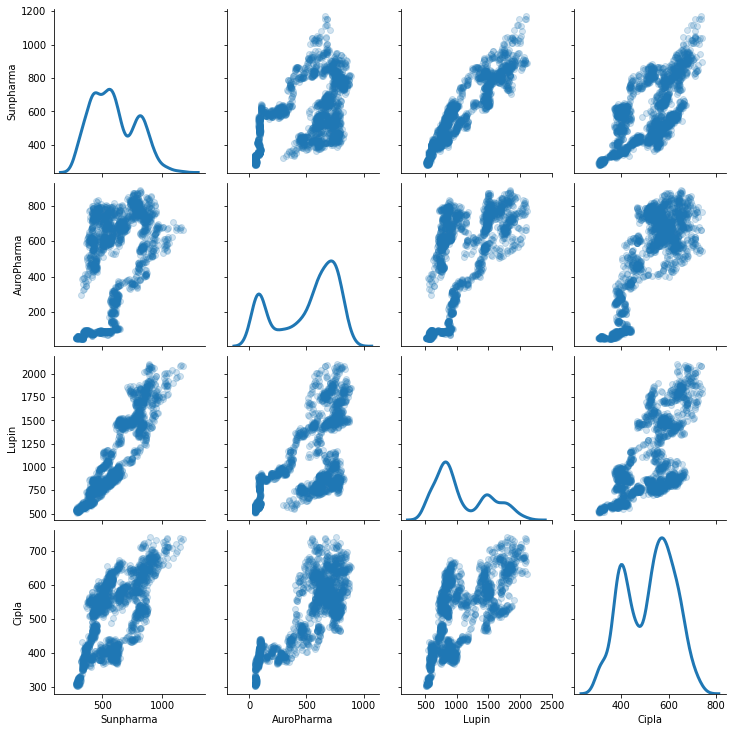

In [0]:
g=sns.PairGrid(df_scatter)
g.map_diag(sns.kdeplot,lw=3)
g.map_offdiag(plt.scatter,alpha=0.2)

In [0]:
import mplfinance as mpf

In [0]:
df_reset=sunP_df.loc['2020-04']

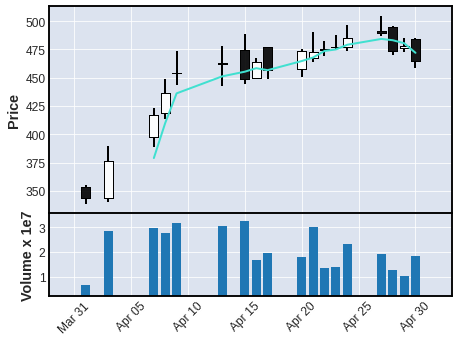

In [0]:
mpf.plot(df_reset,type='candle',volume=True,mav=3,show_nontrading=True)

In [0]:
###Returns
sunP_df['Returns']=sunP_df['Close'].pct_change(periods=1)
auroP_df['Returns']=auroP_df['Close'].pct_change(periods=1)
lupin_df['Returns']=lupin_df['Close'].pct_change(periods=1)
cipla_df['Returns']=cipla_df['Close'].pct_change(periods=1)

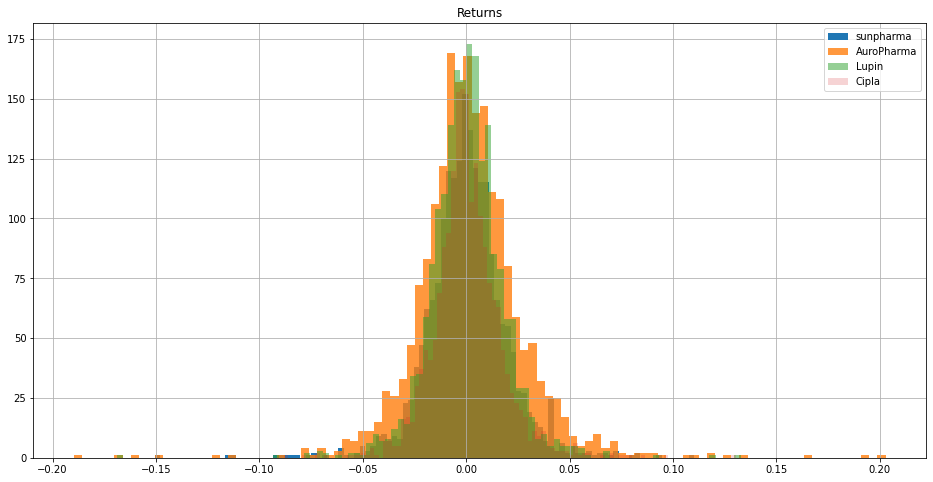

In [0]:
sunP_df['Returns'].hist(bins=100,label='sunpharma',figsize=(16,8))
auroP_df['Returns'].hist(bins=100,label='AuroPharma',alpha=0.8)
lupin_df['Returns'].hist(bins=100,label='Lupin',alpha=0.5)
cipla_df['Returns'].hist(bins=100,label='Cipla',alpha=0.2)
plt.title('Returns')
plt.legend()

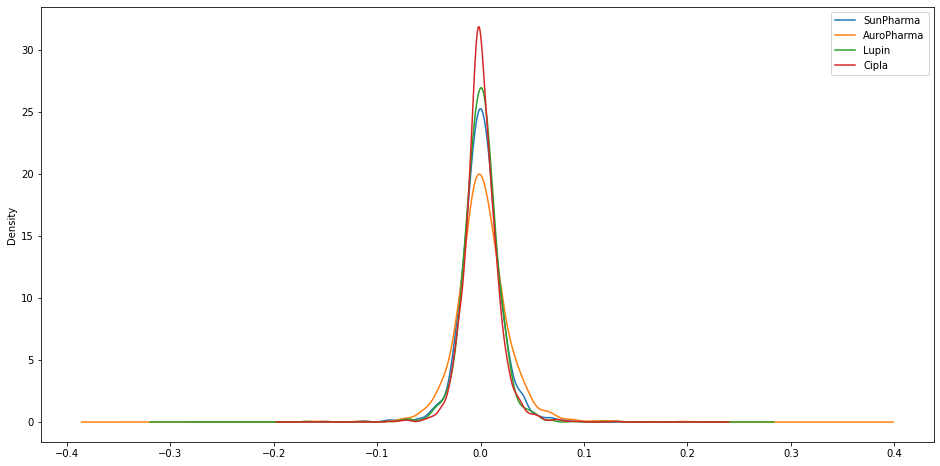

In [0]:
sunP_df['Returns'].plot(kind='kde',label='SunPharma',figsize=(16,8))
auroP_df['Returns'].plot(kind='kde',label='AuroPharma')
lupin_df['Returns'].plot(kind='kde',label='Lupin')
cipla_df['Returns'].plot(kind='kde',label='Cipla')
plt.legend();

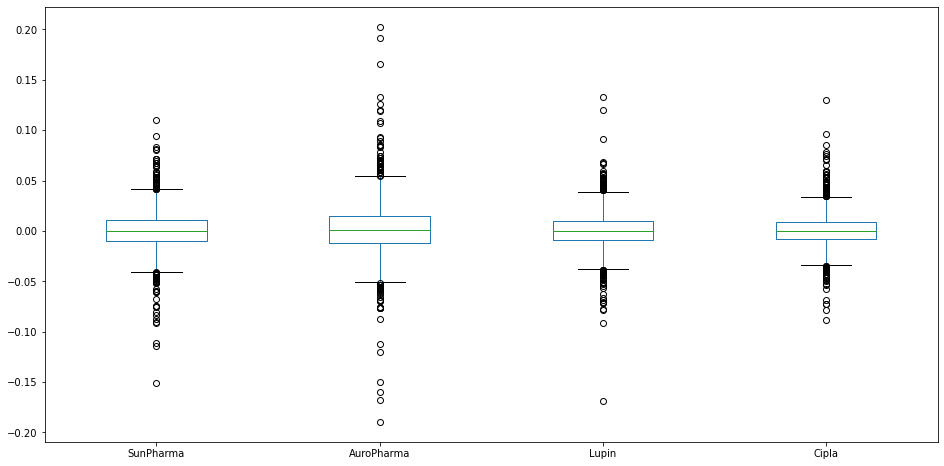

In [0]:
#boxplot
box_df=pd.concat([sunP_df['Returns'],auroP_df['Returns'],lupin_df['Returns'],cipla_df['Returns']],axis=1)
box_df.columns=['SunPharma','AuroPharma','Lupin','Cipla']
box_df.plot(kind='box',figsize=(16,8));

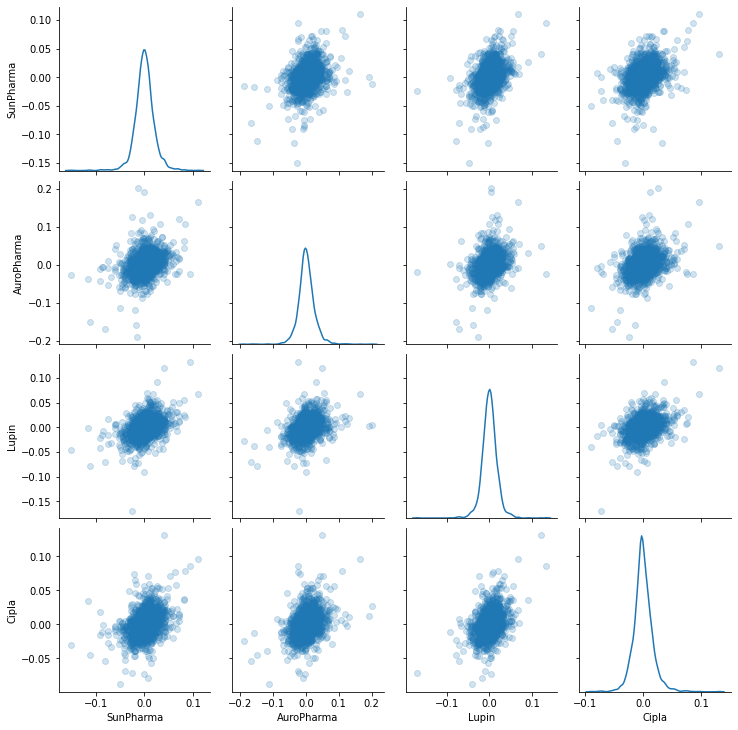

In [0]:
########Correlation among the returns
g=sns.PairGrid(box_df)
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter,alpha=0.2);


In [0]:
##Cumulative Returns

sunP_df['Cumulative Returns']=(1+sunP_df['Returns']).cumprod()
auroP_df['Cumulative Returns']=(1+auroP_df['Returns']).cumprod()
lupin_df['Cumulative Returns']=(1+lupin_df['Returns']).cumprod()
cipla_df['Cumulative Returns']=(1+cipla_df['Returns']).cumprod()

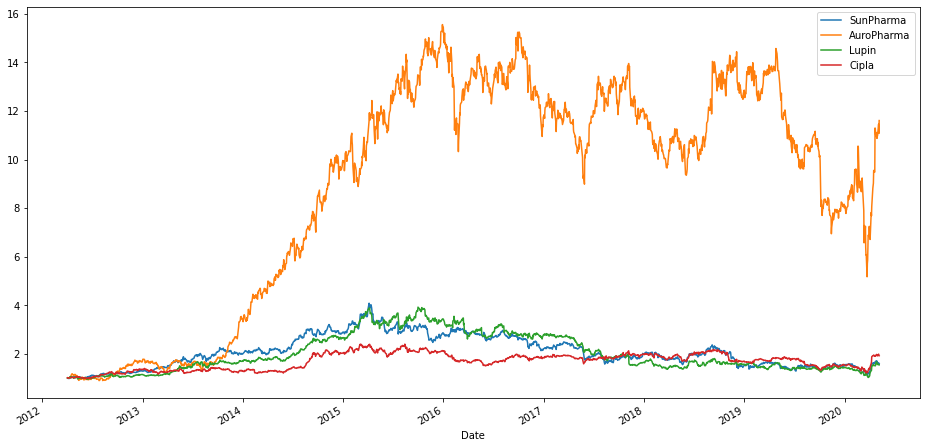

In [0]:
sunP_df['Cumulative Returns'].plot(label='SunPharma',figsize=(16,8))
auroP_df['Cumulative Returns'].plot(label='AuroPharma')
lupin_df['Cumulative Returns'].plot(label='Lupin')
cipla_df['Cumulative Returns'].plot(label='Cipla')
plt.legend()

In [0]:
sunP_df

,High,Low,Open,Close,Volume,Adj Close,MArket Cap,Returns,Cumulative Returns
Date,,,,,,,,,
2012-04-02,288.575012,280.600006,282.549988,286.700012,1217922.0,273.579987,3.491783e+08,NaN,NaN
2012-04-03,288.524994,283.575012,288.149994,284.524994,851142.0,271.504456,2.421712e+08,-0.007586,0.992414
2012-04-04,284.975006,280.100006,284.975006,282.049988,627652.0,269.142761,1.770292e+08,-0.008699,0.983781
2012-04-09,282.475006,277.250000,280.000000,279.575012,561580.0,266.781006,1.570037e+08,-0.008775,0.975148
2012-04-10,285.000000,279.149994,282.000000,283.399994,752576.0,270.430939,2.132800e+08,0.013681,0.988490
...,...,...,...,...,...,...,...,...,...
2020-04-29,484.950012,473.149994,476.000000,477.649994,10166496.0,477.649994,4.856027e+09,0.007807,1.666027
2020-04-30,485.000000,458.399994,484.000000,464.450012,18471206.0,464.450012,8.578952e+09,-0.027635,1.619986
2020-05-04,474.500000,458.000000,464.450012,465.450012,16097066.0,465.450012,7.492380e+09,0.002153,1.623474
